In [2]:
import pandas as pd

train_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")

train_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Check the shape
print("Shape of the data (rows, columns):", train_data.shape)

# Get info about columns
print("\nColumn Information:")
train_data.info()

# View summary statistics for numerical columns
print("\nSummary Statistics:")
print(train_data.describe())

# Check for missing values
print("\nMissing values per column:")
print(train_data.isnull().sum())

Shape of the data (rows, columns): (768, 9)

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
me

In [4]:
# Columns with potentially incorrect zero values
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Count zeros in these columns
print("\nNumber of zero values in key columns:")
for col in columns_with_zeros:
    zero_count = (train_data[col] == 0).sum()
    print(f"{col}: {zero_count}")

# Check the distribution of the target variable
print("\nDistribution of the Outcome variable:")
print(train_data['Outcome'].value_counts())
print("\nPercentage distribution of the Outcome variable:")
print(train_data['Outcome'].value_counts(normalize=True) * 100)


Number of zero values in key columns:
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11

Distribution of the Outcome variable:
Outcome
0    500
1    268
Name: count, dtype: int64

Percentage distribution of the Outcome variable:
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


In [5]:
import numpy as np

# Columns identified with zero values representing missing data
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeros with NaN first to use pandas' median function which ignores NaNs
for col in columns_to_impute:
    # Replace 0s with NaN only in rows where Outcome is not considered (or replace all 0s)
    # For simplicity in EDA, let's replace all 0s for now.
    # When preparing for the model, imputation strategy should be learned on training data.
    train_data[col] = train_data[col].replace(0, np.nan)

# Now, impute the NaNs with the median of the non-NaN values in each column
print("Imputing zero values with the median of non-zero values...")
for col in columns_to_impute:
    median_val = train_data[col].median()
    train_data[col].fillna(median_val, inplace=True)
    print(f"Replaced zeros in '{col}' with median: {median_val:.2f}")

# Let's verify that there are no more NaNs in these columns
print("\nMissing values after imputation:")
print(train_data[columns_to_impute].isnull().sum())

# Also, let's check the describe again to see how the statistics changed
print("\nSummary Statistics after imputation:")
print(train_data.describe())

Imputing zero values with the median of non-zero values...
Replaced zeros in 'Glucose' with median: 117.00
Replaced zeros in 'BloodPressure' with median: 72.00
Replaced zeros in 'SkinThickness' with median: 29.00
Replaced zeros in 'Insulin' with median: 125.00
Replaced zeros in 'BMI' with median: 32.30

Missing values after imputation:
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

Summary Statistics after imputation:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000

/tmp/ipykernel_794/3417943056.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(median_val, inplace=True)
/tmp/ipykernel_794/3417943056.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [6]:
import numpy as np

# Columns identified with zero values representing missing data
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeros with NaN first to use pandas' median function which ignores NaNs
for col in columns_to_impute:
    # Replace 0s with NaN only in rows where Outcome is not considered (or replace all 0s)
    # For simplicity in EDA, let's replace all 0s for now.
    # When preparing for the model, imputation strategy should be learned on training data.
    train_data[col] = train_data[col].replace(0, np.nan)

# Now, impute the NaNs with the median of the non-NaN values in each column
print("Imputing zero values with the median of non-zero values...")
for col in columns_to_impute:
    median_val = train_data[col].median()
    train_data[col].fillna(median_val, inplace=True)
    print(f"Replaced zeros in '{col}' with median: {median_val:.2f}")

# Let's verify that there are no more NaNs in these columns
print("\nMissing values after imputation:")
print(train_data[columns_to_impute].isnull().sum())

# Also, let's check the describe again to see how the statistics changed
print("\nSummary Statistics after imputation:")
print(train_data.describe())

Imputing zero values with the median of non-zero values...
Replaced zeros in 'Glucose' with median: 117.00
Replaced zeros in 'BloodPressure' with median: 72.00
Replaced zeros in 'SkinThickness' with median: 29.00
Replaced zeros in 'Insulin' with median: 125.00
Replaced zeros in 'BMI' with median: 32.30

Missing values after imputation:
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

Summary Statistics after imputation:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000

/tmp/ipykernel_794/3417943056.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(median_val, inplace=True)
/tmp/ipykernel_794/3417943056.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 


Generating Distribution Plots (Histograms):


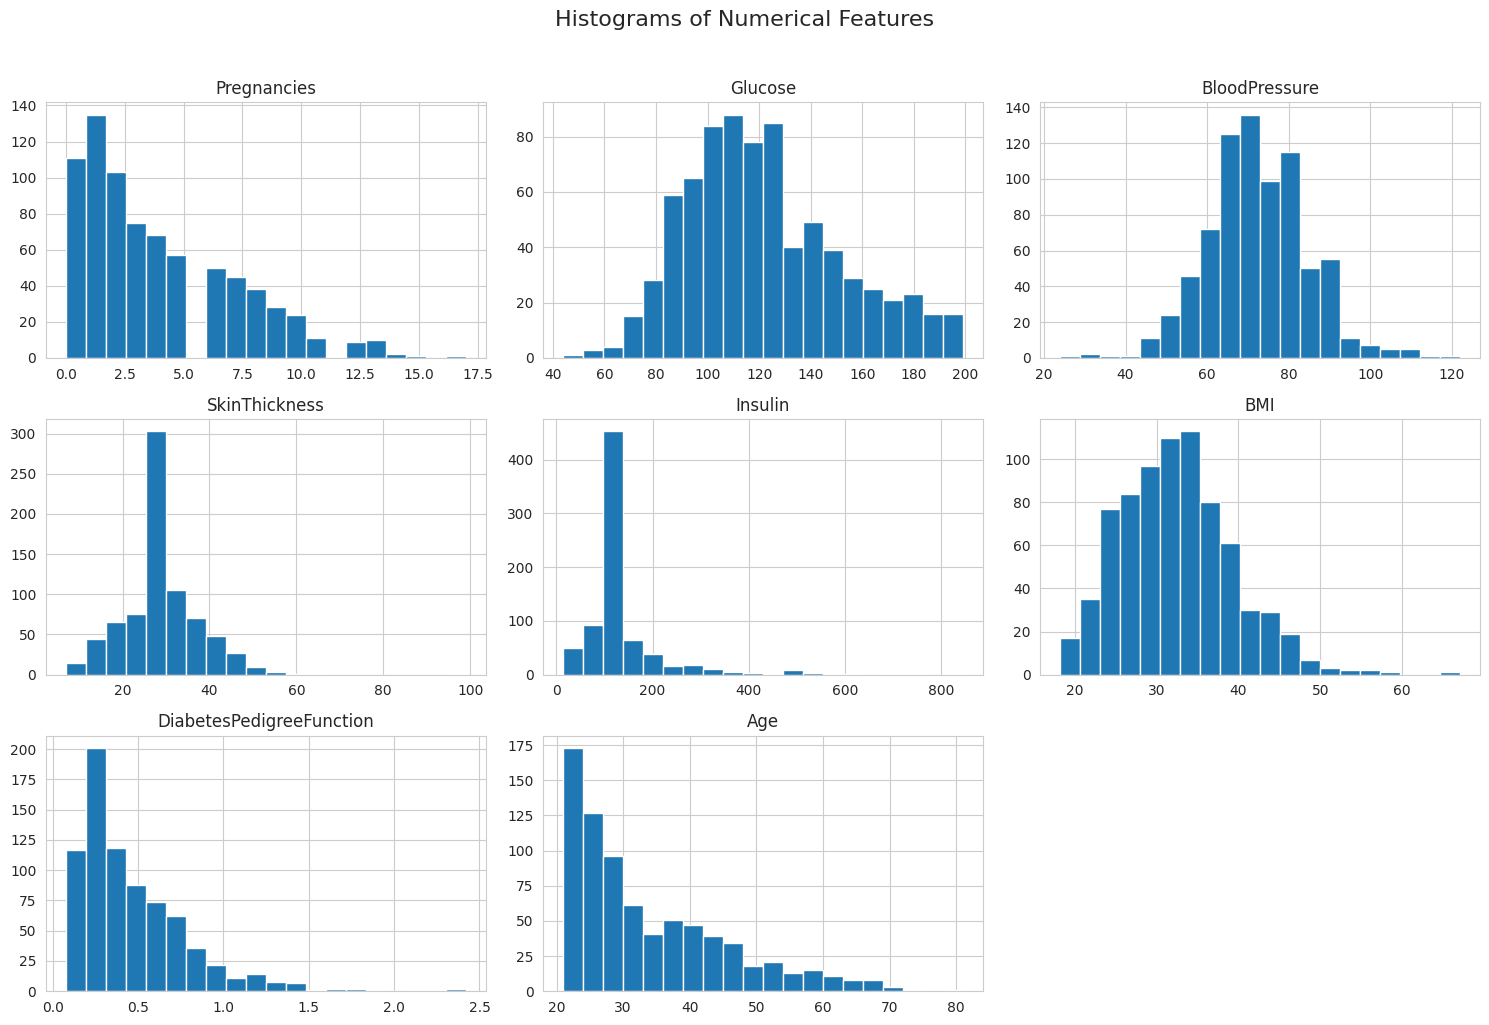


Generating Box Plots:


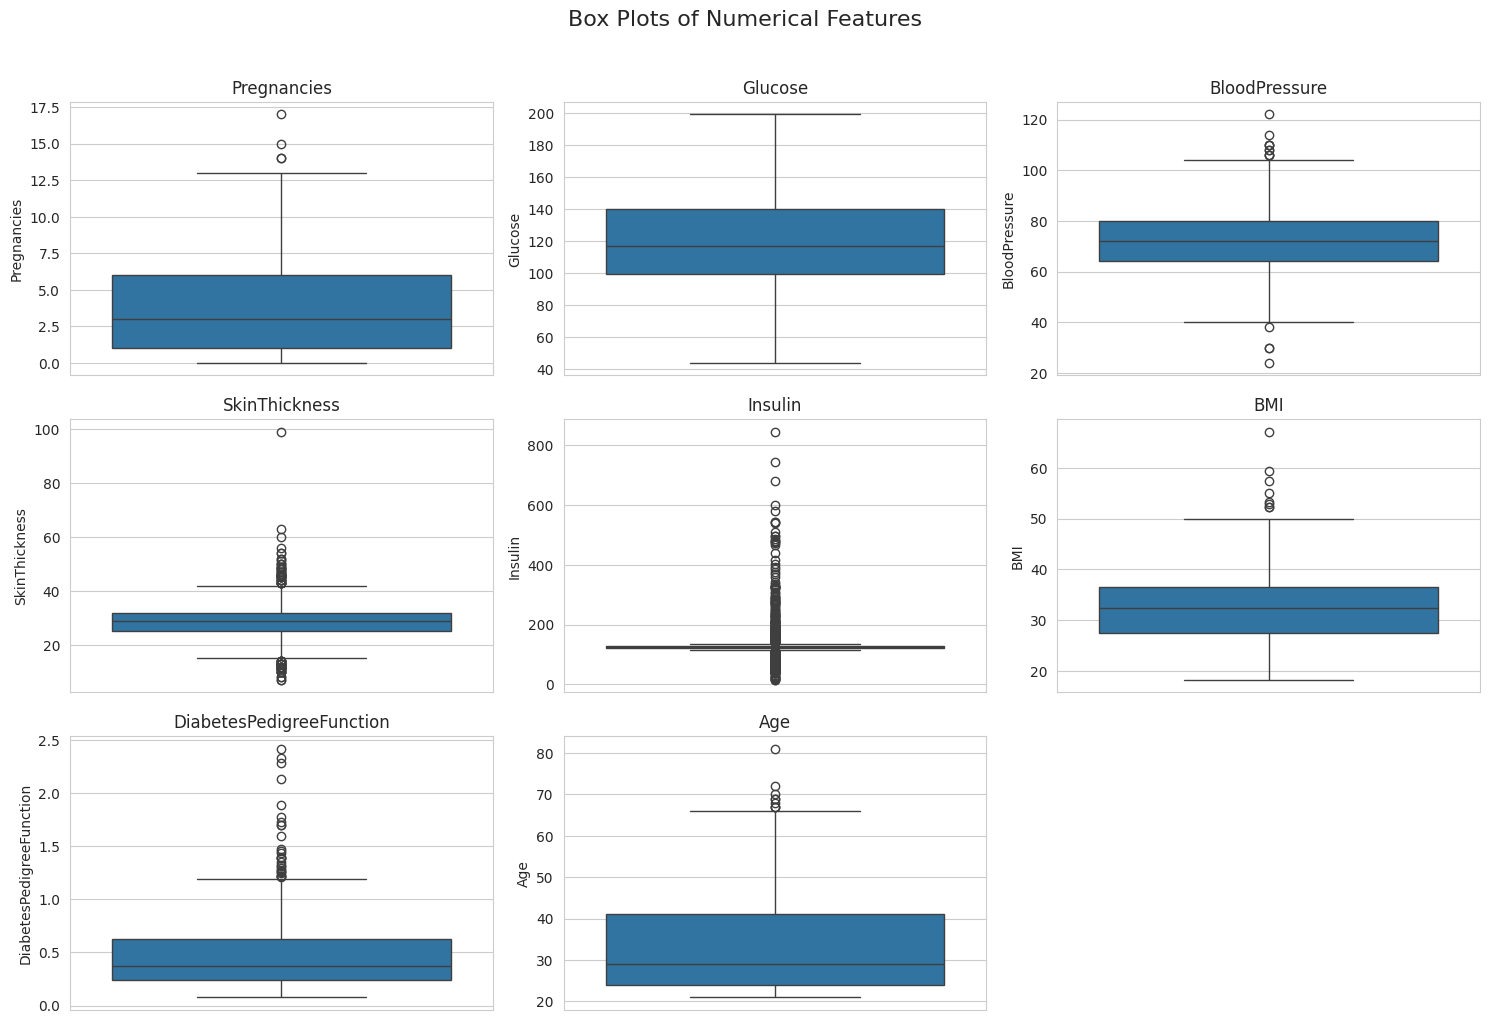


Generating Box Plots by Outcome:


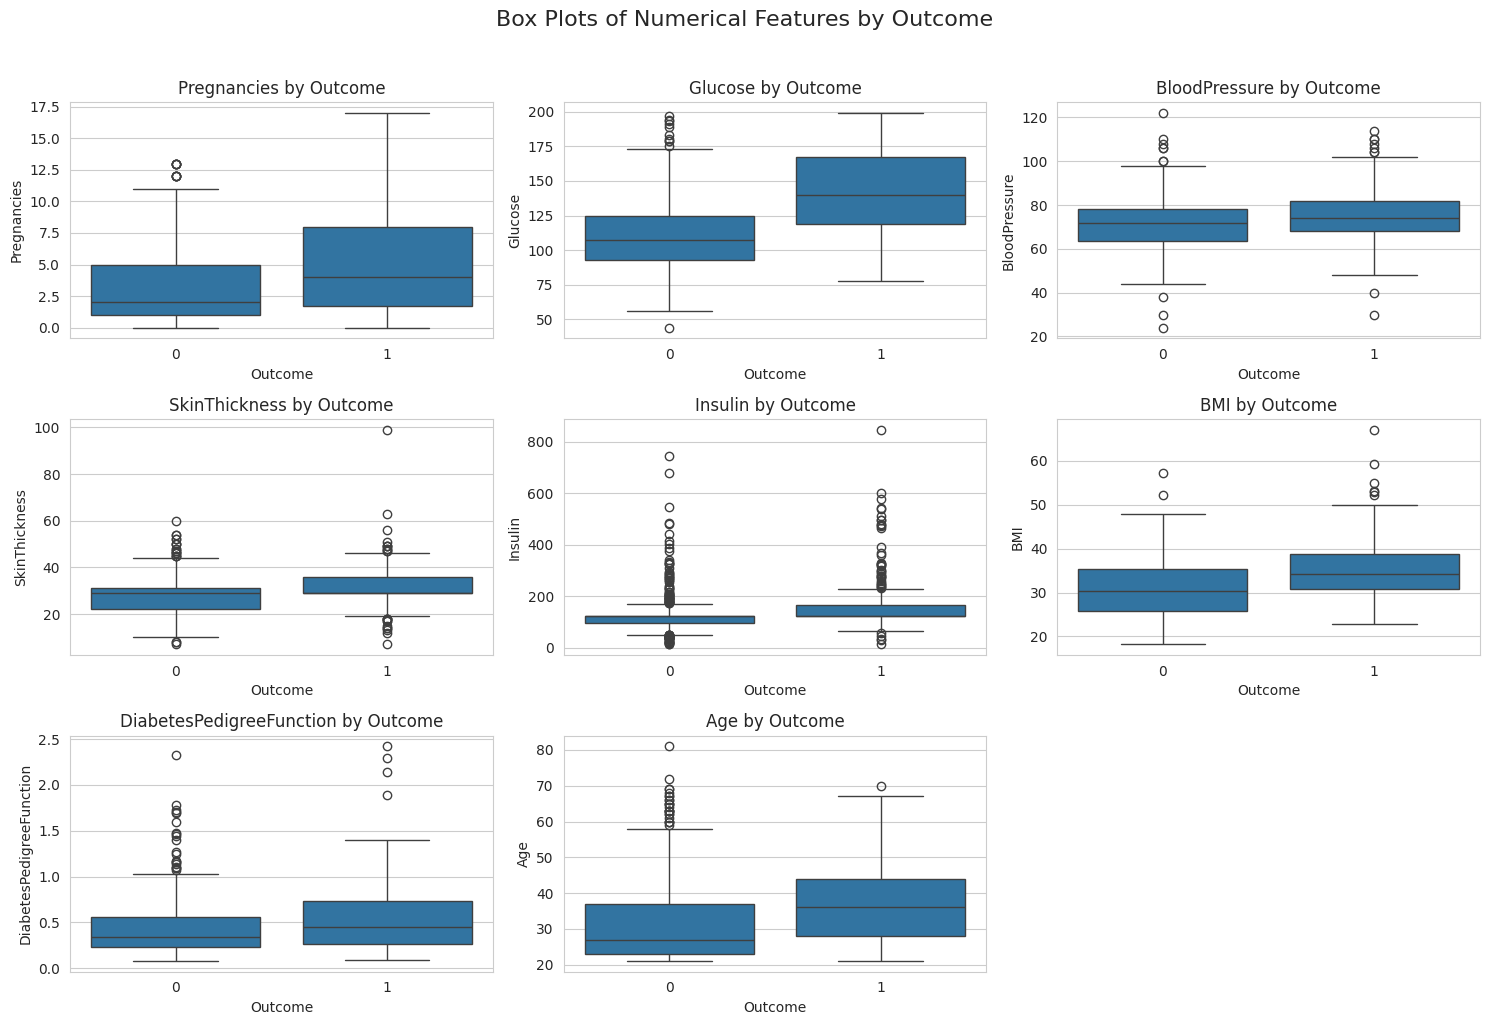

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for plots
sns.set_style("whitegrid")

# List of numerical columns (excluding Outcome for distribution plots)
numerical_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# --- Distribution Plots (Histograms/Density Plots) ---
print("\nGenerating Distribution Plots (Histograms):")
train_data[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# --- Box Plots ---
print("\nGenerating Box Plots:")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid based on number of features
    sns.boxplot(y=train_data[col], data=train_data)
    plt.title(col)
plt.suptitle("Box Plots of Numerical Features", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# --- Box Plots by Outcome ---
# Let's also look at box plots grouped by Outcome to see differences
print("\nGenerating Box Plots by Outcome:")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid
    sns.boxplot(x='Outcome', y=col, data=train_data)
    plt.title(f'{col} by Outcome')
plt.suptitle("Box Plots of Numerical Features by Outcome", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

In [8]:
# --- Feature Engineering: BMI Categories ---
# Define BMI categories and their boundaries
bmi_bins = [0, 18.5, 24.9, 29.9, train_data['BMI'].max()] # Use max BMI as upper bound
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']

# Create a new column 'BMI_Category'
train_data['BMI_Category'] = pd.cut(train_data['BMI'], bins=bmi_bins, labels=bmi_labels, right=True, include_lowest=True)

print("\n'BMI_Category' Value Counts:")
print(train_data['BMI_Category'].value_counts())

# --- Feature Engineering: Age Groups ---
# Define Age groups and their boundaries
age_bins = [0, 25, 40, 60, train_data['Age'].max()] # Use max Age as upper bound
age_labels = ['Young Adult', 'Adult', 'Middle-aged', 'Senior']

# Create a new column 'Age_Group'
train_data['Age_Group'] = pd.cut(train_data['Age'], bins=age_bins, labels=age_labels, right=True, include_lowest=True)

print("\n'Age_Group' Value Counts:")
print(train_data['Age_Group'].value_counts())

# Display the first few rows with the new features
print("\nDataFrame head with new features:")
print(train_data.head())


'BMI_Category' Value Counts:
BMI_Category
Obese          483
Overweight     179
Normal         102
Underweight      4
Name: count, dtype: int64

'Age_Group' Value Counts:
Age_Group
Adult          307
Young Adult    267
Middle-aged    167
Senior          27
Name: count, dtype: int64

DataFrame head with new features:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome BMI_Category    Age_Group  
0                     0.627   50        1        Obese  Middle-aged  
1                     0.351   31        0   Overweight        Adult  
2                     0.672   32      

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# --- 1. Separate Features (X) and Target (y) ---
X = train_data.drop('Outcome', axis=1) # All columns except 'Outcome' are features
y = train_data['Outcome']             # 'Outcome' is the target variable

print("Original Features shape:", X.shape)
print("Target shape:", y.shape)

# --- 2. Handle Categorical Features with One-Hot Encoding ---
# Identify categorical columns to encode
categorical_features = ['BMI_Category', 'Age_Group']

# Identify numerical columns (all others) - we'll keep them as they are
numerical_features = [col for col in X.columns if col not in categorical_features]
# Make sure to exclude the original BMI and Age if you *only* want the categories
# If you want both, keep them in numerical_features

# Create a column transformer for one-hot encoding categorical features
# 'passthrough' keeps the numerical features as they are
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features) # handle_unknown='ignore' helps if test set has new categories
    ])

# Apply the transformations
# We fit and transform on X before splitting for simplicity in this step,
# but in a production pipeline, you'd typically fit the transformer on X_train
# and transform both X_train and X_test after the split.
# However, for showing the prepared features, let's transform X now.
X_processed = preprocessor.fit_transform(X)

# If using pandas DataFrames instead of numpy arrays, you might convert back:
# X_processed_df = pd.DataFrame(X_processed, columns=preprocessor.get_feature_names_out(X.columns))
# print("\nProcessed Features (first 5 rows, sample columns):")
# print(X_processed_df.head())
# Note: preprocessor.get_feature_names_out() requires scikit-learn version >= 0.23

print("\nProcessed Features shape after One-Hot Encoding:", X_processed.shape)


# --- 3. Split the Data into Training and Testing Sets ---
# We'll split the *processed* features and the target
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)
# Using stratify=y is important for imbalanced datasets to maintain the class distribution in both train and test sets
# random_state ensures reproducibility of the split

print("\nTraining features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Original Features shape: (768, 10)
Target shape: (768,)

Processed Features shape after One-Hot Encoding: (768, 16)

Training features shape: (614, 16)
Testing features shape: (154, 16)
Training target shape: (614,)
Testing target shape: (154,)


In [10]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import time # To measure training time

# --- 1. Instantiate the XGBoost Classifier ---
# We'll use a common objective for binary classification and set a random state
xgb_model = xgb.XGBClassifier(objective='binary:logistic', # Predicts probabilities
                              eval_metric='logloss',      # Metric for evaluation during training (optional)
                              use_label_encoder=False,    # Suppress warning
                              random_state=42)

print("XGBoost model instantiated.")

# --- 2. Train the Model ---
print("Starting model training...")
start_time = time.time()
xgb_model.fit(X_train, y_train)
end_time = time.time()
print(f"Model training finished in {end_time - start_time:.2f} seconds.")


# --- 3. Make Predictions ---
print("Making predictions on the test set...")
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1] # Get probability of the positive class (1)


# --- 4. Evaluate the Model ---
print("\nModel Evaluation on the Test Set:")

# Calculate common classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba) # ROC AUC uses probabilities

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")

# Optional: Display Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

XGBoost model instantiated.
Starting model training...


/home/vscode/.local/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [21:31:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model training finished in 0.52 seconds.
Making predictions on the test set...

Model Evaluation on the Test Set:
Accuracy:  0.7403
Precision: 0.6400
Recall:    0.5926
F1-Score:  0.6154
ROC AUC:   0.8159

Confusion Matrix:
[[82 18]
 [22 32]]
